In [47]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



In [48]:
# Load the dataset
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [49]:
# Ensure numeric columns are properly typed
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')
data['Annual Income (k$)'] = pd.to_numeric(data['Annual Income (k$)'], errors='coerce')
data['Spending Score (1-100)'] = pd.to_numeric(data['Spending Score (1-100)'], errors='coerce')

In [50]:
# Convert specific numeric columns to categorical
data['Age'] = pd.cut(data['Age'], bins=[0, 18, 35, 50, 65, 100], labels=['Teen', 'Young Adult', 'Adult', 'Senior', 'Elder'])
data['Annual Income (k$)'] = pd.cut(data['Annual Income (k$)'], bins=[0, 30, 60, 90, 120, 150], labels=['Low', 'Below Average', 'Average', 'Above Average', 'High'])
data['Spending Score (1-100)'] = pd.cut(data['Spending Score (1-100)'], bins=[0, 2, 4, 6, 8, 10], labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

In [51]:
# Fill missing values for categorical columns
data.fillna(data.mode().iloc[0], inplace=True)

In [52]:
# Encode non-numeric columns
label_encoder = LabelEncoder()
for col in data.select_dtypes(exclude=[np.number]).columns:
    data[col] = label_encoder.fit_transform(data[col].astype(str))

In [53]:
# Select features
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = data[features]

In [54]:
# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

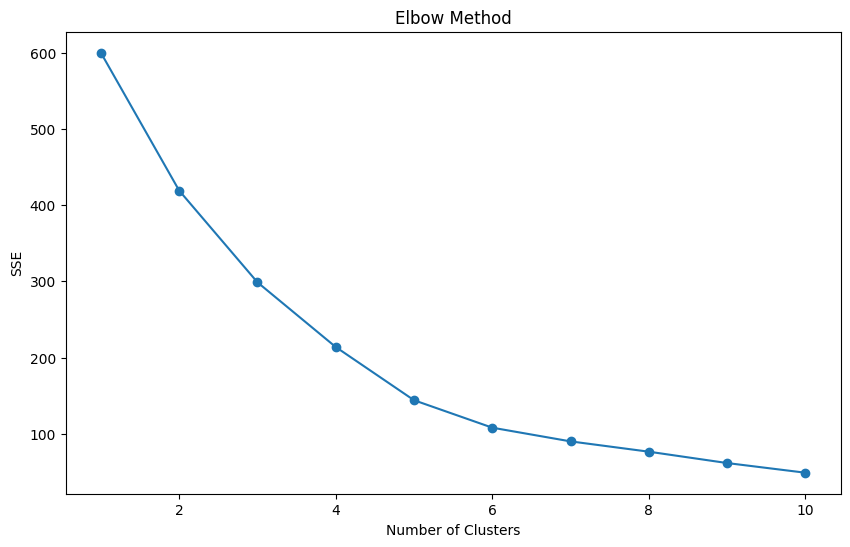

In [55]:
# Determine the optimal number of clusters using Elbow method
sse = [KMeans(n_clusters=k, random_state=42).fit(X_scaled).inertia_ for k in range(1, 11)]
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

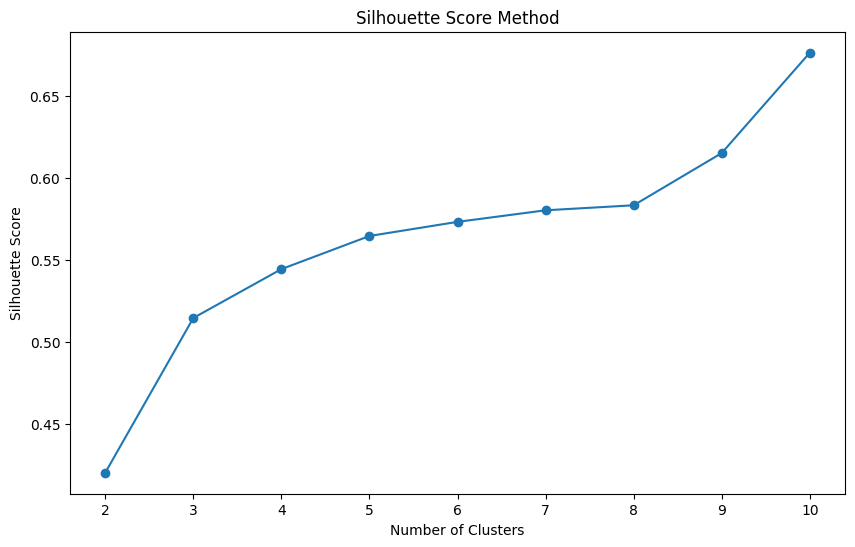

In [56]:
# Determine the optimal number of clusters using Silhouette Score method
sil_scores = [silhouette_score(X_scaled, KMeans(n_clusters=k, random_state=42).fit_predict(X_scaled)) for k in range(2, 11)]
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), sil_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.show()

In [57]:
# Apply KMeans clustering
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


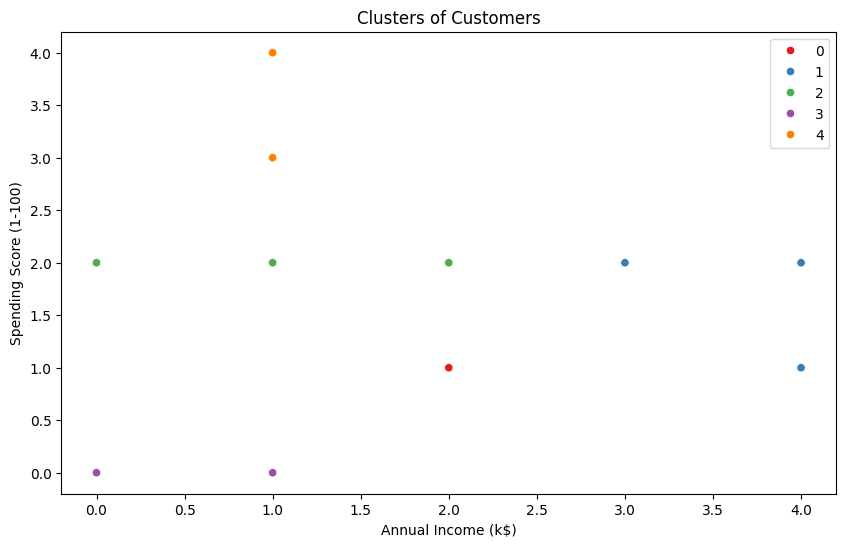

In [58]:
# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set1')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

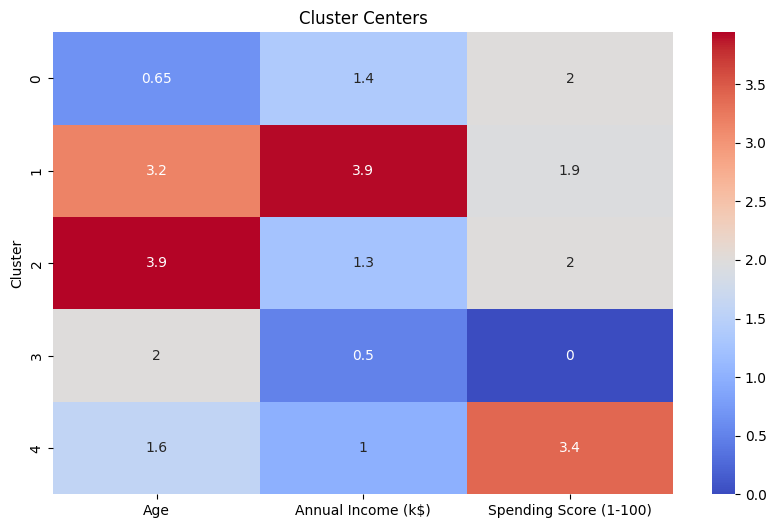

In [59]:
# Plot cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=features)
cluster_centers_df['Cluster'] = range(optimal_clusters)
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_centers_df.set_index('Cluster'), annot=True, cmap='coolwarm')
plt.title('Cluster Centers')
plt.show()



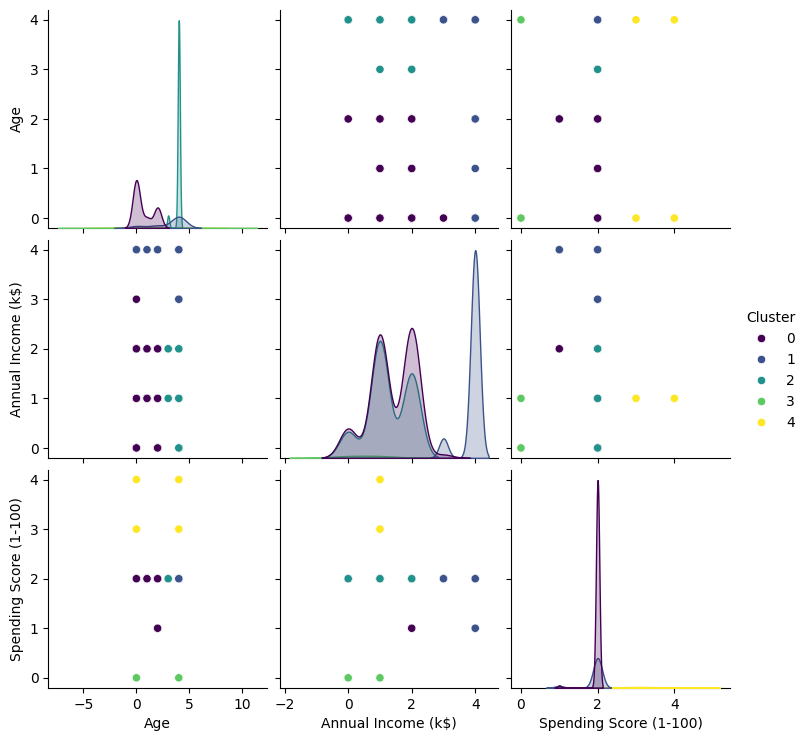

In [60]:
# Pairplot of features colored by cluster
sns.pairplot(data, hue='Cluster', palette='viridis', vars=features)
plt.show()